<a href="https://colab.research.google.com/github/ghassantaleb/MarkovChainTextGenerator/blob/main/MarkovChainTextGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Markov Chain Text Generation Project

### Project Description

This project implements a simple text generation algorithm using Markov chains. Markov chains are a statistical model that predicts the next state in a sequence based on the current state. In the context of text generation, we use the model to predict the next word in a sequence based on the previous words.

The Markov chain algorithm works by analyzing an input text corpus, learning patterns of word transitions, and then generating new sequences of text by sampling from these learned patterns. The model can be adjusted by changing the size of the word sequence (referred to as `n`) used to make predictions, which can influence how coherent or random the generated text appears.

This basic implementation uses word pairs (bigram) to predict the next word. You can modify the input text, change the size of the word sequence (`n`), and adjust the length of the generated text to experiment with different outcomes.


# Code Implementation

In [9]:
import random

class MarkovChain:
    def __init__(self):
        self.chain = {}

    def train(self, text, n=1):
        words = text.split()
        index = 0
        for i in range(len(words) - n):
            key = tuple(words[i:i+n])
            next_word = words[i + n]
            if key not in self.chain:
                self.chain[key] = []
            self.chain[key].append(next_word)

    def generate(self, size=20, seed=None):
        if seed is None:
            seed = random.choice(list(self.chain.keys()))
        output = list(seed)
        for _ in range(size - len(seed)):
            seed = tuple(output[-len(seed):])
            if seed in self.chain:
                next_word = random.choice(self.chain[seed])
                output.append(next_word)
            else:
                break
        return ' '.join(output)

# Example usage
text = "This is an example text. This text is for training a simple Markov chain text generator."
mc = MarkovChain()
mc.train(text, n=2)  # Train with word pairs
generated_text = mc.generate(size=15)
print(generated_text)


a simple Markov chain text generator.


In [14]:
# Load text from a file
with open('/sample_text.txt', 'r') as file:
    text = file.read()


In [15]:
def generate_custom_text(mc, seed_text, size=20):
    seed_words = seed_text.split()
    generated_text = mc.generate(size=size, seed=tuple(seed_words))
    return generated_text


In [16]:
import pickle

# Save the model
with open('markov_chain_model.pkl', 'wb') as model_file:
    pickle.dump(mc, model_file)

# Load the model
with open('markov_chain_model.pkl', 'rb') as model_file:
    mc = pickle.load(model_file)


In [17]:
!pip install networkx matplotlib


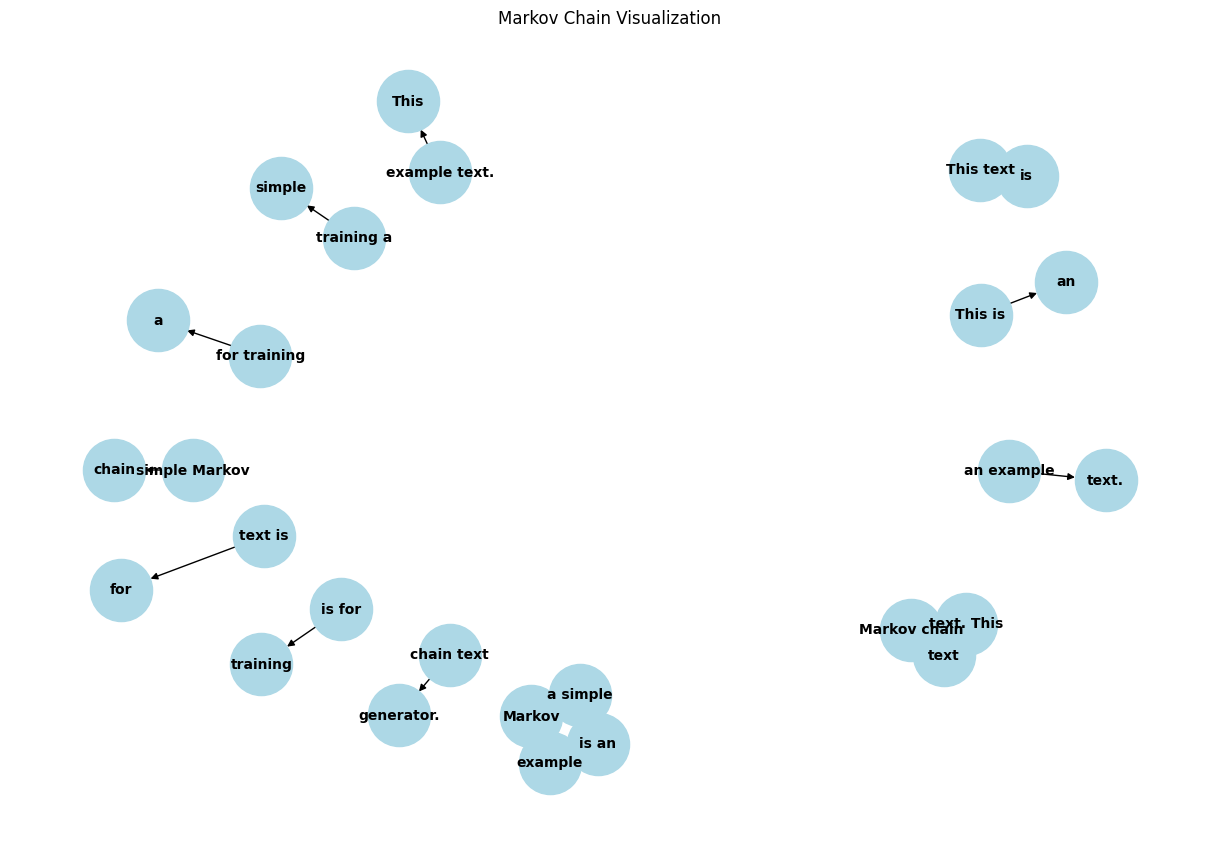

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_markov_chain(mc):
    G = nx.DiGraph()  # Create a directed graph
    for key, next_words in mc.chain.items():
        for next_word in next_words:
            G.add_edge(' '.join(key), next_word)  # Create edges between current and next words

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Layout for the graph
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
    plt.title('Markov Chain Visualization')
    plt.show()

# Example usage
visualize_markov_chain(mc)  # Visualize the trained Markov chain


### Conclusion

The visualization of the Markov chain provides insight into the relationships and transitions between words learned from the training dataset. Each node in the graph represents a unique word or sequence of words, while the directed edges indicate the likelihood of transitioning from one word to the next based on the training data.

This representation helps us understand how the model generates text by sampling from the possible next words based on the current word or sequence of words. The density of the graph and the connectivity of nodes can reveal patterns in the text, such as frequently occurring phrases and potential word associations.

In practical applications, visualizing the Markov chain can assist in identifying potential biases in the text data, understanding context, and improving the quality of generated text by adjusting the training corpus or the model parameters. Overall, this visualization serves as a valuable tool for analyzing the behavior of the text generation model.
